<H3>Import libraries</H3>

In [1]:
import numpy as np
import os
from scipy.misc import imread, imsave, imresize, imshow
import random
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
import gc
from sklearn.cross_validation import train_test_split

import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb

<H3>Read the files containing Phase '0' data</H3>

In [2]:
train = pd.read_csv('train_part\\0\\X_train_0_a.csv')

In [3]:
train1 = pd.read_csv('train_part\\0\\X_train_0_b.csv')

In [4]:
train = train.append(train1)

In [5]:
del train1
gc.collect()

15

In [6]:
train = train.sample(frac=1).reset_index(drop=True)

In [7]:
train.drop(train.columns[[0,1,2,6,7]], axis = 1, inplace = True)
train.drop('PH', axis=1, inplace=True)

In [8]:
train['Month1']=np.where(train['Month']==1.0, 1,0)
train['Month2']=np.where(train['Month']==2.0, 1,0)
train['Month3']=np.where(train['Month']==3.0, 1,0)
train['Month4']=np.where(train['Month']==4.0, 1,0)
train['Month5']=np.where(train['Month']==5.0, 1,0)
train['Month6']=np.where(train['Month']==6.0, 1,0)
train['Month7']=np.where(train['Month']==7.0, 1,0)
train['Month8']=np.where(train['Month']==8.0, 1,0)
train['Month9']=np.where(train['Month']==9.0, 1,0)
train['Month10']=np.where(train['Month']==10.0, 1,0)
train['Month11']=np.where(train['Month']==11.0, 1,0)
train['Month12']=np.where(train['Month']==12.0, 1,0)
train['Hour1']=np.where(train['Hour']==1.0, 1,0)
train['Hour2']=np.where(train['Hour']==2.0, 1,0)
train['Hour3']=np.where(train['Hour']==3.0, 1,0)
train['Hour4']=np.where(train['Hour']==4.0, 1,0)
train['Hour5']=np.where(train['Hour']==5.0, 1,0)
train['Hour6']=np.where(train['Hour']==6.0, 1,0)
train['Hour7']=np.where(train['Hour']==7.0, 1,0)
train['Hour8']=np.where(train['Hour']==8.0, 1,0)
train['Hour9']=np.where(train['Hour']==9.0, 1,0)
train['Hour10']=np.where(train['Hour']==10.0, 1,0)
train['Hour11']=np.where(train['Hour']==11.0, 1,0)
train['Hour12']=np.where(train['Hour']==12.0, 1,0)
train['Hour13']=np.where(train['Hour']==13.0, 1,0)
train['Hour14']=np.where(train['Hour']==14.0, 1,0)
train['Hour15']=np.where(train['Hour']==15.0, 1,0)
train['Hour16']=np.where(train['Hour']==16.0, 1,0)
train['Hour17']=np.where(train['Hour']==17.0, 1,0)
train['Hour18']=np.where(train['Hour']==18.0, 1,0)
train['Hour19']=np.where(train['Hour']==19.0, 1,0)
train['Hour20']=np.where(train['Hour']==20.0, 1,0)
train['Hour21']=np.where(train['Hour']==21.0, 1,0)
train['Hour22']=np.where(train['Hour']==22.0, 1,0)
train['Hour23']=np.where(train['Hour']==23.0, 1,0)
train['Hour24']=np.where(train['Hour']==24.0, 1,0)

In [9]:
train.drop('Month', axis = 1, inplace = True)
train.drop('Hour', axis = 1, inplace = True)

In [10]:
y = train.pop('FF')

<H3>Partition the data</H3>

In [16]:
xtrain2, xtrain1, y2, y1 = train_test_split(train, y, test_size = 0.2, random_state = 2016)

In [17]:
xgtrain1 = xgb.DMatrix(xtrain1, label = y1)

In [18]:
xgtrain2 = xgb.DMatrix(xtrain2, label = y2)

<H3>Train the model</H3>

In [19]:
params = {}
params["objective"] = "reg:linear"
params["booster"] = "gbtree"
params["max_depth"] = 6
params["eval_metric"] = 'rmse'
params["subsample"] = 0.9
params["colsample_bytree"] = 0.9
params["silent"] = 1
params["seed"] = 2016
params["eta"] = 0.1

plst = list(params.items())
num_rounds = 500
early_stopping_rounds = 10

watchlist = [(xgtrain2,'train'),(xgtrain1, 'eval')]

model_0_1 = xgb.train(plst, xgtrain2, num_rounds, evals = watchlist, early_stopping_rounds = 10, verbose_eval = True)

[0]	train-rmse:4428.48	eval-rmse:4419.84
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:3989.62	eval-rmse:3982.1
[2]	train-rmse:3595.3	eval-rmse:3588.64
[3]	train-rmse:3240.81	eval-rmse:3234.94
[4]	train-rmse:2921.06	eval-rmse:2916.04
[5]	train-rmse:2633.5	eval-rmse:2629.21
[6]	train-rmse:2374.88	eval-rmse:2371.22
[7]	train-rmse:2142.68	eval-rmse:2139.64
[8]	train-rmse:1933.78	eval-rmse:1931.38
[9]	train-rmse:1746.27	eval-rmse:1744.42
[10]	train-rmse:1577.67	eval-rmse:1576.33
[11]	train-rmse:1426.24	eval-rmse:1425.36
[12]	train-rmse:1290.34	eval-rmse:1289.87
[13]	train-rmse:1168.53	eval-rmse:1168.37
[14]	train-rmse:1059.33	eval-rmse:1059.55
[15]	train-rmse:961.512	eval-rmse:962.206
[16]	train-rmse:873.898	eval-rmse:874.989
[17]	train-rmse:795.432	eval-rmse:796.973
[18]	train-rmse:725.462	eval-rmse:727.382
[19]	train-rmse:662.58	eval-rmse:664.823
[20]	train-rmse:606.595	eval-rm

<H3>Train second model by creating a new partition</H3>

In [20]:
xtrain2, xtrain1, y2, y1 = train_test_split(train, y, test_size = 0.2, random_state = 1982)

In [21]:
xgtrain1 = xgb.DMatrix(xtrain1, label = y1)

In [22]:
xgtrain2 = xgb.DMatrix(xtrain2, label = y2)

In [23]:
watchlist = [(xgtrain2,'train'),(xgtrain1, 'eval')]
model_0_2 = xgb.train(plst, xgtrain2, num_rounds, evals = watchlist, early_stopping_rounds = 10, verbose_eval = True)

[0]	train-rmse:4427.45	eval-rmse:4424.05
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:3988.62	eval-rmse:3985.57
[2]	train-rmse:3594.03	eval-rmse:3591.22
[3]	train-rmse:3239.34	eval-rmse:3236.96
[4]	train-rmse:2920.48	eval-rmse:2918.61
[5]	train-rmse:2633.01	eval-rmse:2631.35
[6]	train-rmse:2374.79	eval-rmse:2373.35
[7]	train-rmse:2142.62	eval-rmse:2141.53
[8]	train-rmse:1933.79	eval-rmse:1932.85
[9]	train-rmse:1746.4	eval-rmse:1745.73
[10]	train-rmse:1577.98	eval-rmse:1577.39
[11]	train-rmse:1426.41	eval-rmse:1425.81
[12]	train-rmse:1290.52	eval-rmse:1289.9
[13]	train-rmse:1168.99	eval-rmse:1168.53
[14]	train-rmse:1059.93	eval-rmse:1059.4
[15]	train-rmse:962.281	eval-rmse:961.685
[16]	train-rmse:875.114	eval-rmse:874.639
[17]	train-rmse:796.721	eval-rmse:796.28
[18]	train-rmse:726.408	eval-rmse:726.14
[19]	train-rmse:664.076	eval-rmse:663.705
[20]	train-rmse:608.298	eval-rms

<H3>Read test data</H3>

In [24]:
test = pd.read_csv('test\\CAX_Test.csv')

In [25]:
test = test[test.PH==0]

In [26]:
test.drop(test.columns[[0,1,2,6,7]], axis = 1, inplace = True)

In [27]:
test.drop('PH', axis=1, inplace=True)

In [28]:
test['Month1']=np.where(test['Month']==1.0, 1,0)
test['Month2']=np.where(test['Month']==2.0, 1,0)
test['Month3']=np.where(test['Month']==3.0, 1,0)
test['Month4']=np.where(test['Month']==4.0, 1,0)
test['Month5']=np.where(test['Month']==5.0, 1,0)
test['Month6']=np.where(test['Month']==6.0, 1,0)
test['Month7']=np.where(test['Month']==7.0, 1,0)
test['Month8']=np.where(test['Month']==8.0, 1,0)
test['Month9']=np.where(test['Month']==9.0, 1,0)
test['Month10']=np.where(test['Month']==10.0, 1,0)
test['Month11']=np.where(test['Month']==11.0, 1,0)
test['Month12']=np.where(test['Month']==12.0, 1,0)
test['Hour1']=np.where(test['Hour']==1.0, 1,0)
test['Hour2']=np.where(test['Hour']==2.0, 1,0)
test['Hour3']=np.where(test['Hour']==3.0, 1,0)
test['Hour4']=np.where(test['Hour']==4.0, 1,0)
test['Hour5']=np.where(test['Hour']==5.0, 1,0)
test['Hour6']=np.where(test['Hour']==6.0, 1,0)
test['Hour7']=np.where(test['Hour']==7.0, 1,0)
test['Hour8']=np.where(test['Hour']==8.0, 1,0)
test['Hour9']=np.where(test['Hour']==9.0, 1,0)
test['Hour10']=np.where(test['Hour']==10.0, 1,0)
test['Hour11']=np.where(test['Hour']==11.0, 1,0)
test['Hour12']=np.where(test['Hour']==12.0, 1,0)
test['Hour13']=np.where(test['Hour']==13.0, 1,0)
test['Hour14']=np.where(test['Hour']==14.0, 1,0)
test['Hour15']=np.where(test['Hour']==15.0, 1,0)
test['Hour16']=np.where(test['Hour']==16.0, 1,0)
test['Hour17']=np.where(test['Hour']==17.0, 1,0)
test['Hour18']=np.where(test['Hour']==18.0, 1,0)
test['Hour19']=np.where(test['Hour']==19.0, 1,0)
test['Hour20']=np.where(test['Hour']==20.0, 1,0)
test['Hour21']=np.where(test['Hour']==21.0, 1,0)
test['Hour22']=np.where(test['Hour']==22.0, 1,0)
test['Hour23']=np.where(test['Hour']==23.0, 1,0)
test['Hour24']=np.where(test['Hour']==24.0, 1,0)

In [29]:
test.drop('Month', axis = 1, inplace = True)
test.drop('Hour', axis = 1, inplace = True)
test.drop('FF', axis = 1, inplace = True)
test_id = test.pop('id')

In [30]:
xgtest = xgb.DMatrix(test)

<H3>Make predictions on the test set using both the models</H3>

In [31]:
pred1 = model_0_1.predict(xgtest)
pred2 = model_0_2.predict(xgtest)

In [32]:
submission_0 = pd.DataFrame(columns = ['id', 'pred1', 'pred2', 'FF'])

<H3>Take average prediction as the final prediction</H3>

In [33]:
submission_0['id'] = test_id
submission_0['pred1'] = pred1
submission_0['pred2'] = pred2
submission_0['FF'] = (submission_0['pred1']+submission_0['pred2'])/2.0

In [34]:
submission_0.drop('pred1', axis = 1, inplace = True)
submission_0.drop('pred2', axis = 1, inplace = True)

<H3>Create submission file</H3>

In [35]:
submission_0.to_csv('0819\\submission_0.csv', index = False)

<H3>Feature importance</H3>

In [36]:
feat_imp_1 = pd.Series(model_0_1.get_fscore()).sort_values(ascending=False)
feat_imp_2 = pd.Series(model_0_2.get_fscore()).sort_values(ascending=False)

In [37]:
%matplotlib inline

In [38]:
feat_imp_1.to_csv('feat_imp_0_1.csv')
feat_imp_2.to_csv('feat_imp_0_2.csv')

<H3>Plot feature importance</H3>

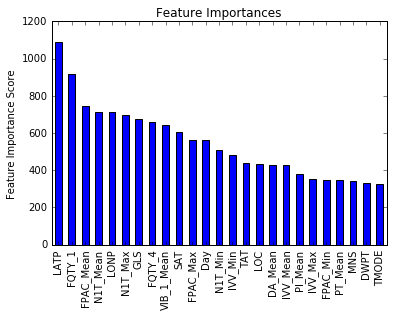

In [39]:
feat_imp_1[:25].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

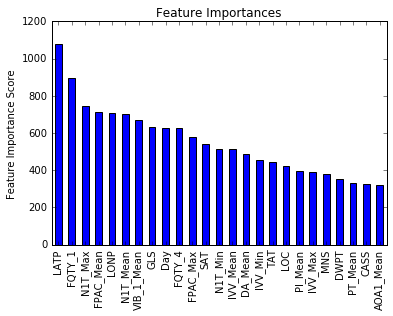

In [40]:
feat_imp_2[:25].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')